In [25]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd


In [26]:

df = pd.read_csv('https://raw.githubusercontent.com/laxmimerit/All-CSV-ML-Data-Files-Download/master/twitter_sentiment.csv', header=None,index_col=0)
df.head()

,1,2,3
0,,,
2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2401,Borderlands,Positive,im coming on borderlands and i will murder you...
2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [27]:
df =df[[2,3]].reset_index(drop=True)

In [28]:
df.columns=['sentiment','text']
df.head(3)

,sentiment,text
0,Positive,im getting on borderlands and i will murder yo...
1,Positive,I am coming to the borders and I will kill you...
2,Positive,im getting on borderlands and i will kill you ...


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75682 entries, 0 to 75681
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  75682 non-null  object
 1   text       74996 non-null  object
dtypes: object(2)
memory usage: 1.2+ MB


In [30]:
df.isnull().sum()
df.dropna(inplace=True)


In [31]:
sum(df['text'].apply(len)>5),sum(df['text'].apply(len)<=5)

(72883, 2113)

In [32]:
print(df.shape)
df=df[df['text'].apply(len)>5]
print(df.shape)

(74996, 2)
(72883, 2)


In [33]:
df['sentiment'].value_counts()

sentiment
Negative      22020
Positive      20186
Neutral       17899
Irrelevant    12778
Name: count, dtype: int64

In [41]:
import preprocess_kgptalkie as ps

df.columns

Index(['sentiment', 'text'], dtype='object')

In [43]:
df = ps.get_basic_features(df)

In [44]:
df.columns

Index(['sentiment', 'text', 'char_counts', 'word_counts', 'avg_wordlength',
       'stopwords_counts', 'hashtag_counts', 'mentions_counts',
       'digits_counts', 'uppercase_counts'],
      dtype='object')

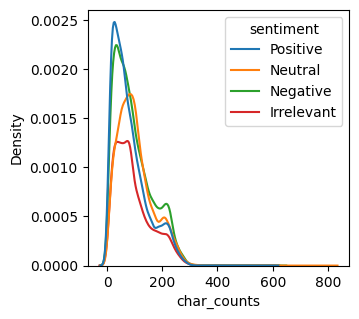

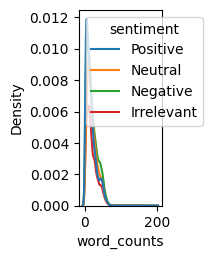

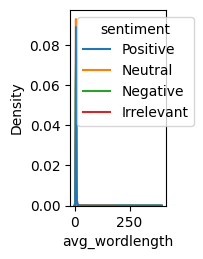

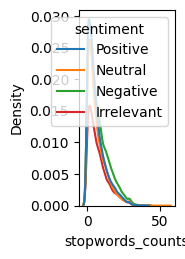

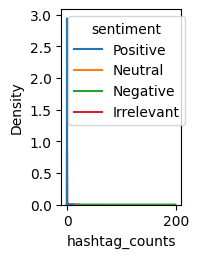

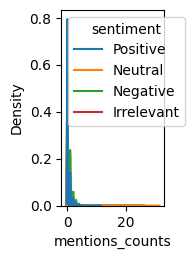

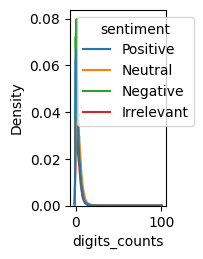

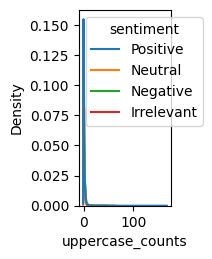

In [57]:
df.head()

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
num_cols= df.select_dtypes(include='number').columns

for index, col in enumerate(num_cols):
    plt.subplot(2, 4, index + 1)
    sns.kdeplot(data=df,x=col,hue="sentiment",fill=False)
    plt.tight_layout()
    plt.show() 


<Axes: ylabel='count'>

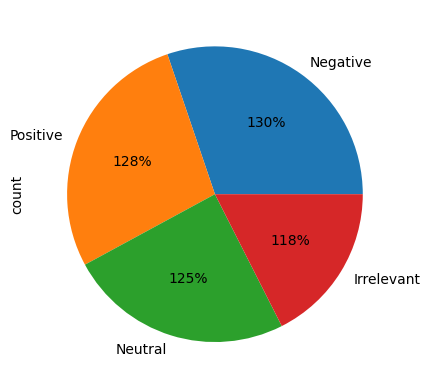

In [58]:
df['sentiment'].value_counts().plot(kind='pie',autopct="1%.0f%%")

In [61]:
from wordcloud import WordCloud,STOPWORDS
Stopwords=set(STOPWORDS)

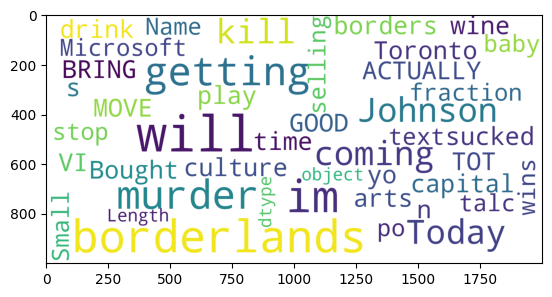

In [63]:
wordcloud=WordCloud(background_color='white',stopwords=Stopwords,max_words=300,max_font_size=40,scale=5).generate(str(df['text']))
plt.imshow(wordcloud)

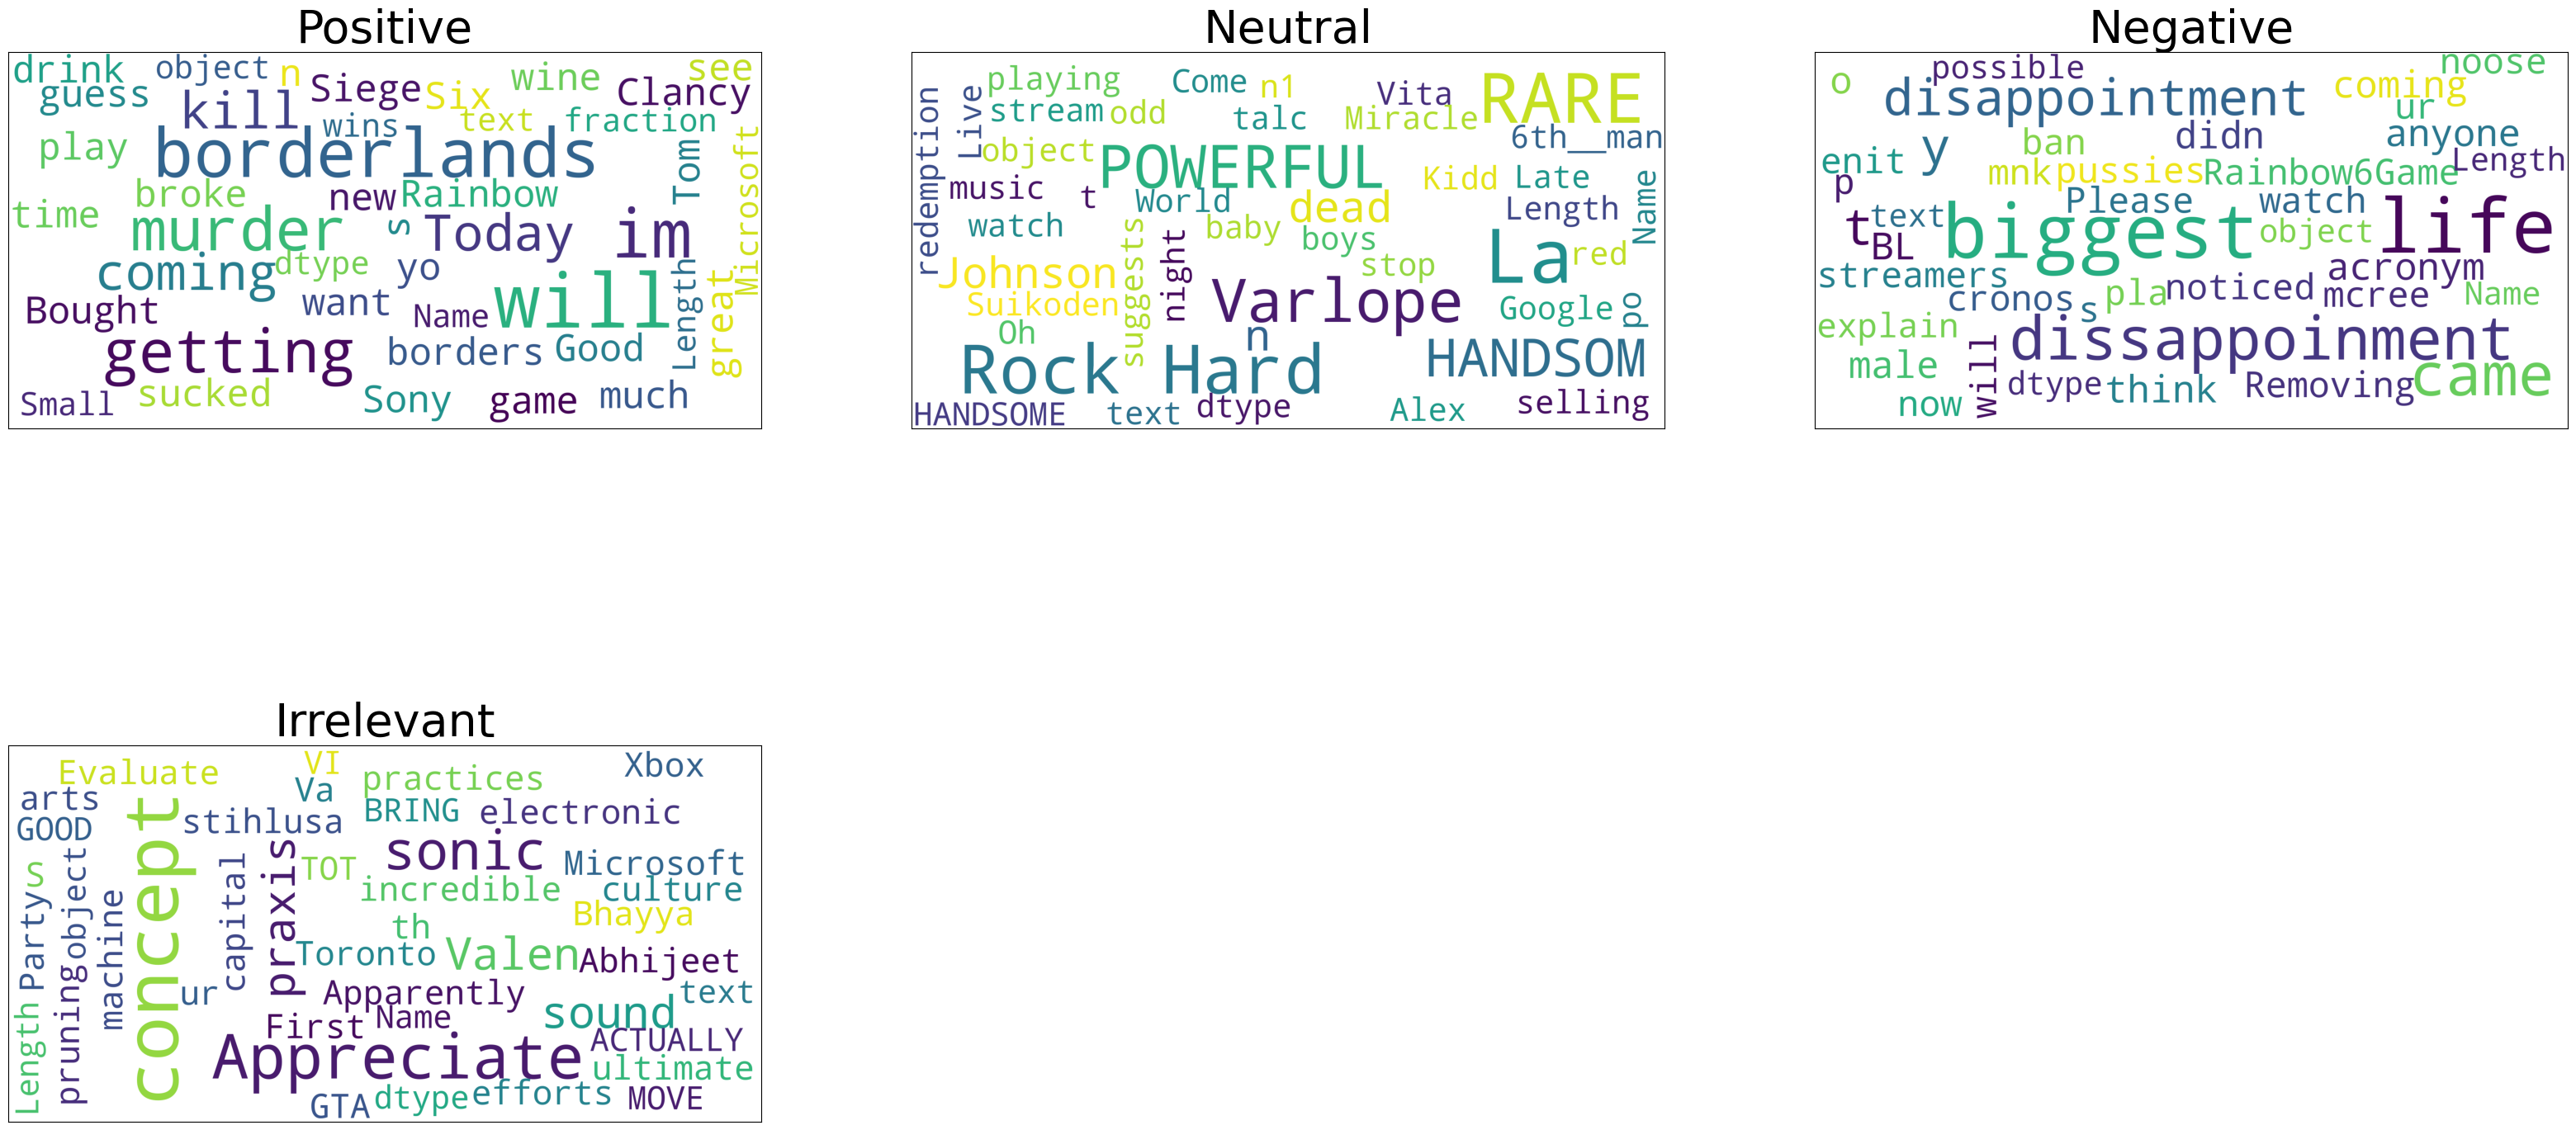

In [66]:
plt.figure(figsize=(40,20))
for index, sent in enumerate(df['sentiment'].unique()):
    plt.subplot(2,3, index+1)

    data=df[df['sentiment']==sent]['text']
    wordcloud=WordCloud(background_color='white',stopwords=Stopwords,max_words=300,max_font_size=40,scale=5).generate(str(data))

    plt.imshow(wordcloud)
    plt.xticks([])
    plt.yticks([])
    plt.title(sent,fontsize=40)
    

In [78]:
df['text']=df['text'].apply(lambda x:x.lower())
df['text']=df['text'].apply(lambda x:ps.remove_urls(x))
df['text']=df['text'].apply(lambda x:ps.remove_html_tags(x))
df['text']=df['text'].apply(lambda x:ps.remove_rt(x))
df['text']=df['text'].apply(lambda x:ps.remove_special_chars(x))

In [81]:
from sklearn.model_selection import train_test_split

# Correct the parameter name from 'text_size' to 'test_size'
x_train, x_test, y_train, y_test = train_test_split(
    df['text'],  # Features
    df['sentiment'],  # Target
    test_size=0.2,  # 20% of the data will be used for testing
    random_state=0  # For reproducibility
)

In [82]:
x_train.shape, x_test.shape

((58306,), (14577,))

In [84]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline



In [96]:
clf = Pipeline([('tfid',TfidfVectorizer(stop_words=Stopwords)),('rfc',RandomForestClassifier(n_jobs=-1))])
clf.fit(x_train,y_train)

Pipeline(steps=[('tfid',
                 TfidfVectorizer(stop_words=["how's", 'did', 'ours', 'nor',
                                             'during', "she's", 'their', 'own',
                                             'could', "didn't", 'those', 'up',
                                             'yourselves', 'being', 'down',
                                             "you'd", 'my', 'of', 'else',
                                             'over', 'this', 'below', 'from',
                                             'however', 'the', 'any', 'because',
                                             'or', "don't", 'do', ...])),
                ('rfc', RandomForestClassifier(n_jobs=-1))])

In [97]:
from sklearn.metrics import classification_report

y_pred = clf.predict(x_test)

# Print the classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

  Irrelevant       0.97      0.86      0.91      2561
    Negative       0.93      0.95      0.94      4481
     Neutral       0.92      0.91      0.92      3553
    Positive       0.89      0.95      0.92      3982

    accuracy                           0.92     14577
   macro avg       0.93      0.92      0.92     14577
weighted avg       0.93      0.92      0.92     14577



In [98]:
import pickle
pickle.dump(clf,open("twitter_sentiment.pkl",'wb'))

In [99]:
clf.predict(['let me not upset you'])

array(['Negative'], dtype=object)

In [100]:
clf.predict(['i am really glad to see you'])

array(['Positive'], dtype=object)

In [101]:
clf.predict(['how the hell are we into hallowen month already'])

array(['Irrelevant'], dtype=object)

In [102]:
clf.predict(['i have done nothing but play borderland'])

array(['Positive'], dtype=object)